##### Task 1. Create a human mobility network for MA using the provided csv file.          

* network node: individual census block group (neighborhood) in MA
* network edge: residents from one neighborhood visiting another
* weight of network tie: percentage of residents from one neighborhood visiting another         
##### How many nodes and edges are there in your network? 

In [46]:
import os
import networkx as nx
path_homework10= "/Users/[editted]/Documents/BC/SOCY7700/compSoc/homework 10/MA_cbg_human_mobility_2019"
os.chdir(path_homework10)

In [47]:
import pandas as pd
ma_df = pd.read_csv('MA_cbg2cbg_2019_01.csv')

In [48]:
print(ma_df.shape)
ma_df.head()

(840593, 5)


,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count
0,250250303003,2019_1,19187,250250303003,413
1,250250303003,2019_1,19187,250251010016,182
2,250250303003,2019_1,19187,440070008003,122
3,250250303003,2019_1,19187,250250923002,121
4,250250303003,2019_1,19187,250173686001,112


In [49]:
import networkx as nx
G = nx.Graph()

for i in range(len(ma_df)):
    origin_cbg = ma_df.loc[i, 'poi_cbg']
    destination_cbg = ma_df.loc[i, 'visitor_census_tract']
    total_residents_in_origin = ma_df.loc[i, 'raw_device_counts']
    num_visitor = ma_df.loc[i, 'visitor_count']
    percent_visitor = num_visitor / total_residents_in_origin
    #print(origin_cbg, destination_cbg, percent_visitor)
    # add an edge/tie between two neighborhoods with weight being percentage of residents from one neighborhood visiting another
    G.add_edge(origin_cbg, destination_cbg, weight=percent_visitor)
    # G.remove_edge(origin_cbg, destination_cbg) # removing edge

In [31]:
print(nx.info(G))

Graph with 40292 nodes and 742299 edges


/var/folders/6j/g9631c1s65l0d3hl76jkmfc40000gn/T/ipykernel_46833/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


##### Task 2. Calculate weighted node degree and unweighted node degree for each census block group in the mobility network and use the results to create a pandas dataframe. The dataframe should have three columns. One column stores the census block group id, and the other two the two calculated node degrees. 

In [18]:
import csv

In [65]:
 weighted_list = []
unweighted_list = []

for node in G.nodes():
    unweighted_list.append(G.degree(node))
    weighted_list.append(G.degree(node, weight='weight'))

df = pd.DataFrame(columns=['ID','Weighted','Unweighted'])
df['ID'] = G.nodes()
df['Weighted'] = weighted_list
df['Unweighted'] = unweighted_list
df.to_csv('mobility_network_data.csv',index=False)

df=pd.read_csv('mobility_network_data.csv')
print(df.shape)
df.head()

(40292, 3)


,ID,Weighted,Unweighted
0,250250303003,1.617298,2936
1,250251010016,1.829781,609
2,440070008003,0.201907,77
3,250250923002,2.675362,600
4,250173686001,1.763752,3217


##### Task 3. Create a plot that visualizes the distribution of the weighted node degrees. Is the human mobility network a scale-free network? In other words, does the degree distribution follow a power law? 

array([[<AxesSubplot:title={'center':'Weighted'}>]], dtype=object)

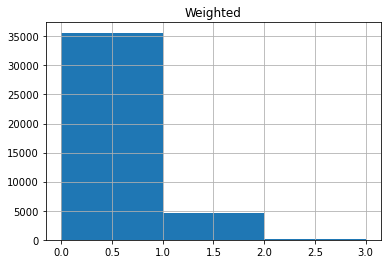

In [69]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
degree_df=df.drop(['Unweighted'], axis=1)
degree_df.hist(column=['Weighted'], bins = [0,1,2,3])

(array([[    0.,     0.,     0.],
        [35617.,  4527.,   144.]]),
 array([0, 1, 2, 3]),
 <a list of 2 BarContainer objects>)

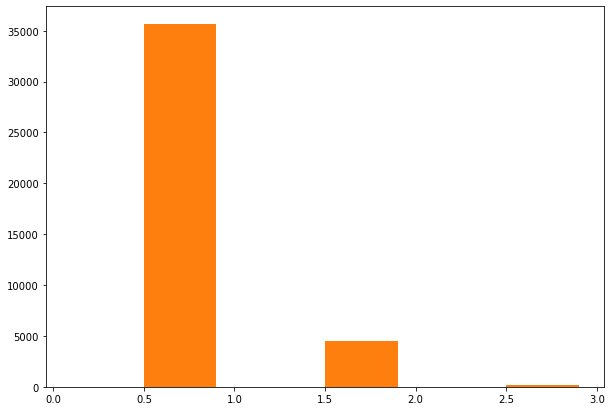

In [68]:
from matplotlib import pyplot as plt
import numpy as np
fig, dfh = plt.subplots(figsize =(10, 7))
dfh.hist(degree_df, bins = [0,1,2,3])